***
# FMC Arable Units Data Application Conditions
***

### Device IDs
* Device ID **C003308: Arable unit 1**
    * Stine farm HE: *06/10 - present, GPS# 39.66476, -75.80315* 
    * Pasture Location: *03/26-06/09*
    
    
* Device ID **C003354:  Arable unit 2**
    * Stine farm LE: *07/09 - present, GPS# 39.66266, -75.78983*
    * Xuan Location: *03/16-07/08*
    
    
* Device ID **C003305: Arable unit 3**
    * Madera Field Station: *04/27 - present, GPS# 36.93905, -120.20281*
        
* CA side by side: 
    * Campbell system: https://auth.westernwx.com
    * CIMIS (California Irrigation Management Information System): http://ipm.ucanr.edu/ ; https://cimis.water.ca.gov/Default.aspx
    * Arable unit and Campbell distance = 3.5 m
* DE side by side and local weather station:  
    * LE and Davis distance = 16 m
    * LE and HE distance = 0.7248mi
    * LE and UD Newark, DE Ag-farm station distance = 2.37mi
    * UD Delaware Environmental Observing System (DEOS): http://www.deos.udel.edu/#
    
### Other weather station data format
 * Davis data: 
         * head: day, meanT, highT, time, lowT, time, Heat deg Days, Cool deg days, rain, avg wind speed, high, wind DIR
         * unit: TEMPERATURE (°F), RAIN  (in), WIND SPEED (mph)
         * month:4-8-2020
         
 * Madera Campbell data
         * head: Date 	Daily Max Temp (°F) 	Daily Min Temp (°F) 	Temp (°F) 	RH (%) 	Wind Spd (mph) 	Wind Dir (°) 	Daily Rain (In) 	Daily ETo (in)
         * unit: TEMPERATURE (°F), RAIN  (in), WIND SPEED (mph)
         * dates: 5/1-9/25
         * comparable: temp, unit change, rain, Eto, wind spd (4)
         

In [1]:
# use the ! notation to run conda directly as a shell command from the notebook
# Install a conda package in the current Jupyter kernel
import sys
#!conda install --yes --prefix {sys.prefix} numpy
# !conda install git+https://github.com/arable-examples/arable-python-lib
# !conda install --yes --prefix {sys.prefix} git+https://github.com/arable-examples/arable-python-lib
# conda config --append channels conda-forge
# conda install -c conda-forge
# Ctrl + /
# ! conda config --add channels arablepy
!conda install --yes --prefix {sys.prefix} git+https://github.com/arable-examples/arable-python-lib


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: arablepy
  channel url: https://conda.anaconda.org/arablepy
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.




In [4]:
conda config --show channels

channels:
Note: you may need to restart the kernel to use updated packages.

  - arablepy
  - defaults
  - conda-forge


In [1]:
conda config --show-source

==> C:\Users\X\.condarc <==
Note: you may need to restart the kernel to use updated packages.

ssl_verify: True
channel_priority: disabled
channels:
  - arablepy
  - defaults
  - conda-forge



In [ ]:
conda config --remove channels defaults

In [2]:
#load required modules
import arablepy
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# handle time seies data
from datetime import date, datetime, timedelta

ModuleNotFoundError: No module named 'arablepy'

In [2]:
pip3 install git+https:\\github.com\arable-examples\arable-python-lib


SyntaxError: invalid syntax (<ipython-input-2-dab6f9da0239>, line 1)

### Arable Client Authorization

In [3]:
# Create a client instance
client = arablepy.ArableClient()
# Provide credentials
client.connect(apikey ='71129720-3bbb-4ac0-92dd-0737a90f0d5f')

NameError: name 'arablepy' is not defined

### Device IDs and Data Query
* Device ID **C003308: Arable unit 1**
    * Stine farm HE: *06/10 - present, GPS# 39.66476, -75.80315* 
    * Pasture Location: *03/26-06/09*
    
    
* Device ID **C003354:  Arable unit 2**
    * Stine farm LE: *07/09 - present, GPS# 39.66266, -75.78983*
    * Xuan Location: *03/16-07/08*
    
    
* Device ID **C003305: Arable unit 3**
    * Madera Field Station: *04/27 - present, GPS# 36.93905, -120.20281*Data Query 

In [363]:
# Querying HE
# devices = ['C003308','C003354','C003305']
device1 = ['C003308']
# device3 = ['C003354']
# device2 = ['C003354']
#df = client.data('hourly',devices = devices,start_time = '2020-07-08', end_time = '2020-08-31')
df = client.data('daily',devices = device1,start_time = '2020-06-15', end_time = '2020-09-30')
df.time = pd.to_datetime(df['time'])
df = df.set_index(['time'])
# fully show the columns
pd.set_option('display.max_columns', None)  
df.head(3)

,cgdd,cl,crop_water_demand,device,dli,ea,et,etc,gdd,kc,lat,lfairdelta,lfw,location,long,low_quality,max_tdew,maxt,maxt_time,mean_tbelow,meant,min_rh,mint,mint_time,ndvi,prate,precip,precip_hours,rh_at_maxt,rh_at_mint,sample_pct,slp,sunshine_duration,swdw,tdew,tdew_at_mint,vpd,wind_direction,wind_heading,wind_speed,wind_speed_max,wind_speed_min
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-15 00:00:00+00:00,69.6,2.46,-2.3,C003308,43.33,1.34,4.1,2.3,8.3,0.56,39.6648,-5.0,0.0,5edf8e64bfa791d1f77c5bfc,-75.8031,False,12.0,23.8,2020-06-15T14:54:49Z,17.1,18.4,0.43,12.9,2020-06-15T02:51:25Z,0.50,None,0.0,0.0,0.47,0.84,0.95,102.2,10.6,22.0,10.6,10.1,0.9,E,90.89,1.81,5.83,0.0
2020-06-16 00:00:00+00:00,78.0,2.45,-2.3,C003308,41.84,1.25,4.1,2.3,8.5,0.56,39.6648,-5.6,0.0,5edf8e64bfa791d1f77c5bfc,-75.8031,False,12.5,23.6,2020-06-16T14:13:12Z,17.4,18.6,0.44,13.3,2020-06-16T04:23:24Z,0.50,None,0.0,0.0,0.45,0.80,0.94,102.1,10.3,21.3,10.6,9.9,0.9,ENE,80.54,1.96,6.34,0.0
2020-06-17 00:00:00+00:00,86.9,2.58,-1.0,C003308,21.36,1.41,2.1,1.2,8.9,0.58,39.6648,-1.8,1.0,5edf8e64bfa791d1f77c5bfc,-75.8031,False,17.7,22.6,2020-06-17T12:41:14Z,19.1,19.3,0.67,15.2,2020-06-17T04:45:27Z,0.52,None,0.2,1.0,0.68,0.81,0.94,101.7,8.8,10.9,15.0,11.9,0.5,ENE,84.18,2.22,5.46,0.0


In [8]:
et=df[['et','swdw','meant','maxt','mint','min_rh','rh_at_maxt','rh_at_mint',
       'precip','wind_speed','wind_speed_max','wind_speed_min']].copy()
et.head(3)

,et,swdw,meant,maxt,mint,min_rh,rh_at_maxt,rh_at_mint,precip,wind_speed,wind_speed_max,wind_speed_min
time,,,,,,,,,,,,
2020-06-15 00:00:00+00:00,4.1,22.0,18.4,23.8,12.9,0.43,0.47,0.84,0.0,1.81,5.83,0.0
2020-06-16 00:00:00+00:00,4.1,21.3,18.6,23.6,13.3,0.44,0.45,0.80,0.0,1.96,6.34,0.0
2020-06-17 00:00:00+00:00,2.1,10.9,19.3,22.6,15.2,0.67,0.68,0.81,0.2,2.22,5.46,0.0


In [8]:
import numpy as np

mat=[[1, 1, 1, 1, 1],[1, 1, 1, 1, 1], [1, 1, 1, 1, 1],  [1, 1, 1, 1, 0],[1, 1, 1, 0, 0],[0, 0, 0, 0, -1],[0, 0, 0, -1, -1],[0, -1, -1, -1, -1]]
print(np.array(mat))
T=22; RH=75;
rhItv=10; tpItv=5;
rhIdx=(RH-rhMin)/rhItv
tpIdx=(T-tpMin)/tpItv


# Function to insert element
def insert(list, n):
      
    # Searching for the position
    for i in range(len(list)):
        if list[i] > n:
            index = i
            break
      
    # Inserting n in the list
    list = list[:i] + [n] + list[i:]
    return list
  



[[ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  0]
 [ 1  1  1  0  0]
 [ 0  0  0  0 -1]
 [ 0  0  0 -1 -1]
 [ 0 -1 -1 -1 -1]]


In [58]:
import numpy as np
from bisect import bisect


print(np.array(mat))

rh = 55
tp = 80
wd = 1.8
def tempRhRange(tp, rh):
    mat=[[0, -1, -1, -1, -1],\
         [0, 0, 0, -1, -1],\
         [0, 0, 0, 0, -1],\
         [1, 1, 1, 0, 0],\
         [1, 1, 1, 1, 0],\
         [1, 1, 1, 1, 1],\
         [1, 1, 1, 1, 1] ,\
         [1, 1, 1, 1, 1]]

    rhLst = np.linspace(20, 90, num=8)
    tpFLst = np.linspace(59, 95, num=5)
    print(rhLst)
    print(tpF)

    if rh >= 100 or rh < 0 or tp >= 100 or tp <= 55:
        print('RH or temperature is out of range for predication.\n')
    else:
        rh_idx = bisect(rhLst, rh)-1
        tp_idx = bisect(tpFLst, tp)-1
        print(bisect(rhLst, rh))
        print(bisect(tpFLst, tp))
        print('lower end RH is ',rhLst[rh_idx])
        print('lower end Temp is ',tpFLst[tp_idx])
        trfLgt = mat[rh_idx][tp_idx]
        print(trfLgt)
    return trfLgt

def windRange(wd):
    
    if wd >= 3 or wd < 0 or wd <= 1.5:
        trfLgtWd = -1
        print('the wind speed is too high for application.\n')
    elif wd >=1.5:
        trfLgtWd = 1
        print('the wind speed is good for application.\n')
    else:
        trfLgtWd = -1
        print('the wind speed is too low for application.\n')
    return trfLgtWd
trfLgt = tempRhRange(tp, rh)
trfLgtWd = windRange(wd)


[[ 0 -1 -1 -1 -1]
 [ 0  0  0 -1 -1]
 [ 0  0  0  0 -1]
 [ 1  1  1  0  0]
 [ 1  1  1  1  0]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1  1]]
[20. 30. 40. 50. 60. 70. 80. 90.]
[59. 68. 77. 86. 95.]
4
3
lower end RH is  50.0
lower end Temp is  77.0
1
the wind speed is good for application.



In [19]:
import datetime
dtm = datetime.datetime.now()
dt=2.2
wd=3.3
# convert C to F: fahrenheit = (celsius * 1.8) + 32
tpCur = (tp * 1.8) + 32
# convert m/s to mph: mph=mps*2.23694
wd=wdm*2.23694
# array of t and wind, while

# tpMin=min(tpCur)
# dt = tpCur-tpMin

def findTempInv(dt, wd):
    amDt=3
    pmDt=5
    tTh=2
    wdTh=4 # mph
    if dtm.hour <= 12:
        if dt>=amDt:
            print('no inversion')
        elif dt>=tTh:
            if wd>wdTh:
                print('no inversion')
            else:
                print('strong inversion')
        else:
            print('no inversion')
    else:
        if dt>=pmDt:
            print('no inversion')
        elif dt>=tTh:
            if wd>wdTh:
                print('no inversion')
            else:
                print('strong inversion')
        else:
            print('no inversion')
    return

findTempInv(dt, wd)

strong inversion


# 1. Daily evapotranspiration data and associated meteorological factors  
* Arable unit 1 LE,Stine research farm, Newark, DE

<bound method Figure.tight_layout of <Figure size 1296x720 with 6 Axes>>

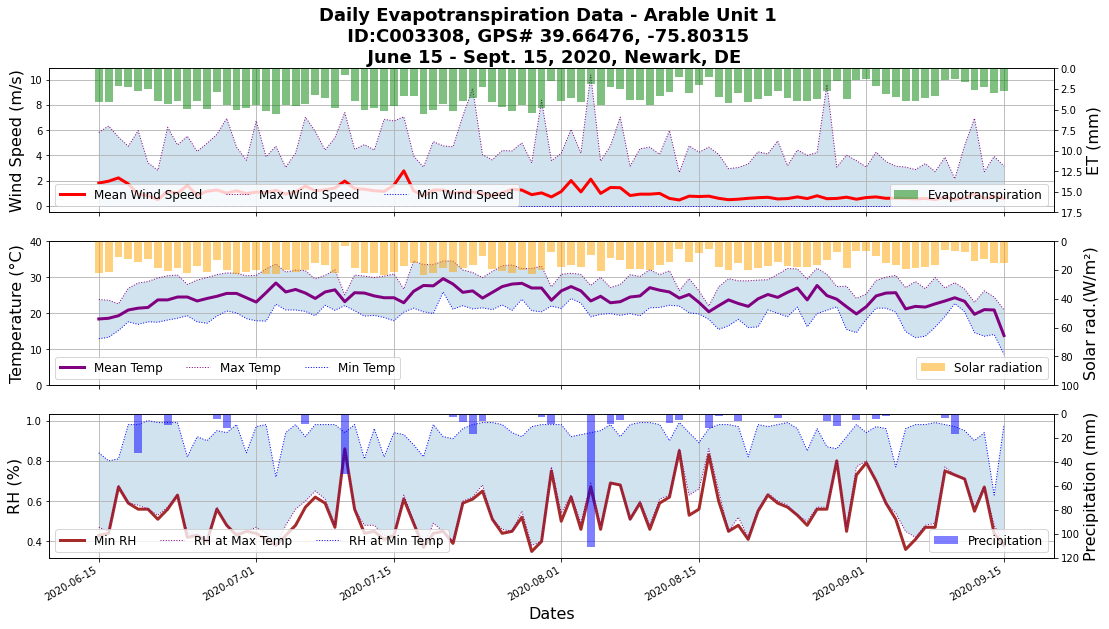

In [141]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(18,10),dpi=72)
fig.autofmt_xdate()
# plot-1
# line
ax[0].plot(et.index,et['wind_speed'],'r',linewidth=3,label='Mean Wind Speed')
ax[0].plot(et.index,et['wind_speed_max'], 'purple',linewidth=1,ls=":",label='Max Wind Speed')
ax[0].plot(et.index,et['wind_speed_min'],'b', linewidth=1,ls=":",label='Min Wind Speed')
ax[0].fill_between(et.index, et.wind_speed_max, et.wind_speed_min, alpha=.2,)
# labels
ax[0].set_ylabel('Wind Speed (m/s)',fontsize = 16)
ax[0].grid(True)
ax[0].legend(loc=3,ncol=3,fontsize = 12)

# bar
ax02= ax[0].twinx()
ax02.bar(et.index,et.et,label='Evapotranspiration',color='green',alpha=.5,)
ax02.set_ylim(0,16)
ax02.set_yticks(np.linspace(ax02.get_yticks()[0],ax02.get_yticks()[-1],len(ax02.get_yticks())))
ax02.invert_yaxis()
# labels
ax02.set_ylabel('ET (mm)',fontsize = 16)
ax02.grid(False)
ax02.legend(loc=4,fontsize = 12)

plt.title('Daily Evapotranspiration Data - Arable Unit 1 \n ID:C003308, GPS# 39.66476, -75.80315  \n June 15 - Sept. 15, 2020, Newark, DE',
          fontsize = 18,fontweight ='bold')

# Plot-2
# line
ax[1].plot(et.index,et['meant'],'purple',linewidth=3,label='Mean Temp')
ax[1].plot(et.index,et['maxt'], 'purple',linewidth=1,ls=":",label='Max Temp')
ax[1].plot(et.index,et['mint'],'b', linewidth=1,ls=":", label='Min Temp')
ax[1].fill_between(et.index, et['maxt'], et['mint'], alpha=.2,)
ax[1].set_ylim(0,40)
# labels
ax[1].set_ylabel('Temperature (°C)',fontsize = 16)
ax[1].grid(True)
ax[1].legend(loc=3,ncol=3,fontsize = 12)

# bar
ax12 = ax[1].twinx()
ax12.bar(et.index,et['swdw'],label='Solar radiation',color='orange',alpha=.5)
ax12.set_ylim(0,100)
ax12.set_yticks(np.linspace(ax12.get_yticks()[0],ax12.get_yticks()[-1],len(ax12.get_yticks())))
ax12.invert_yaxis()
# labels
ax12.set_ylabel('Solar rad.(W/m²)',fontsize = 16)
ax12.grid(False)
ax12.legend(loc=4,fontsize = 12)

# Plot-3
# line
ax[2].plot(et.index,et['min_rh'],'brown',linewidth=3,label='Min RH')
ax[2].plot(et.index,et['rh_at_maxt'], 'purple',linewidth=1,ls=":",label='RH at Max Temp')
ax[2].plot(et.index,et['rh_at_mint'],'b', linewidth=1,ls=":", label='RH at Min Temp')
ax[2].fill_between(et.index, et['rh_at_maxt'], et['rh_at_mint'], alpha=.2,)
#ax[2].set_ylim(0,40)
ax[2].set_xlabel('Dates',fontsize = 16)
# labels
ax[2].set_ylabel('RH (%)',fontsize = 16)
ax[2].grid(True)
ax[2].legend(loc=3,ncol=3,fontsize = 12)

# bar
ax22 = ax[2].twinx()
ax22.bar(et.index,et['precip'],label='Precipitation',color='blue',alpha=.5)
#ax22.set_ylim(0,100)
ax22.set_yticks(np.linspace(ax22.get_yticks()[0],ax22.get_yticks()[-1],len(ax22.get_yticks())))
ax22.invert_yaxis()
# labels
ax22.set_ylabel('Precipitation (mm)',fontsize = 16)
ax22.grid(False)
ax22.legend(loc=4,fontsize = 12)

fig.tight_layout

# 2. Seasonal variations of ET measured by Arable units 

In [487]:
# Querying 
devices = ['C003308','C003354','C003305']
df2 = client.data('daily',devices = devices,start_time = '2020-03-15', end_time = '2020-09-25')
df2.time = pd.to_datetime(df2['time']).dt.strftime("%Y%m%d")
df2 = df2.set_index(['time'])
# fully show the columns
pd.set_option('display.max_columns', None)  
df2['month'] = pd.to_datetime(df2.index).month
df2.head()

,cgdd,cl,crop_water_demand,device,dli,ea,et,etc,gdd,kc,lat,lfairdelta,lfw,location,long,low_quality,max_tdew,maxt,maxt_time,mean_tbelow,meant,min_rh,mint,mint_time,ndvi,prate,precip,precip_hours,rh_at_maxt,rh_at_mint,sample_pct,slp,sunshine_duration,swdw,tdew,tdew_at_mint,vpd,wind_direction,wind_heading,wind_speed,wind_speed_max,wind_speed_min,month
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20200318,NaN,2.63,0.9,C003308,6.09,0.61,1.0,0.5,0.6,0.51,39.782,0.0,2.0,5e725d7062a830a907475f08,-75.5182,False,4.2,13.4,2020-03-18T15:20:54Z,10.7,9.8,0.36,5.6,2020-03-18T23:47:09Z,0.47,None,1.4,2.0,0.36,0.90,0.39,102.1,2.7,3.1,1.3,4.1,0.5,None,NaN,NaN,NaN,NaN,3
20200319,0.0,3.13,14.7,C003308,5.84,0.85,0.5,0.3,0.0,0.59,39.782,0.3,20.0,5e725d7062a830a907475f08,-75.5182,False,10.2,12.2,2020-03-19T18:31:29Z,9.9,9.1,0.86,5.2,2020-03-19T00:59:40Z,0.52,None,15.0,10.0,0.87,0.95,0.90,101.4,1.2,3.0,8.1,4.5,0.1,None,NaN,NaN,NaN,NaN,3
20200320,7.8,2.66,-0.7,C003308,9.99,1.23,1.5,0.8,7.8,0.52,39.782,-1.3,11.0,5e725d7062a830a907475f08,-75.5182,False,17.8,25.5,2020-03-20T17:17:24Z,16.8,17.3,0.49,9.9,2020-03-20T02:23:33Z,0.47,None,0.1,0.0,0.57,1.00,0.90,100.6,4.6,5.1,13.1,9.9,0.6,None,NaN,NaN,NaN,NaN,3
20200321,9.7,2.19,-0.9,C003308,22.48,1.35,2.2,0.9,1.8,0.41,39.782,0.5,0.0,5e725d7062a830a907475f08,-75.5182,False,11.8,19.5,2020-03-21T00:02:39Z,10.8,10.2,0.35,4.7,2020-03-21T23:55:24Z,0.40,None,0.0,0.0,0.60,0.46,0.90,101.5,5.9,11.4,0.2,-5.9,0.6,None,NaN,NaN,NaN,NaN,3
20200322,9.7,2.20,-0.6,C003308,16.52,0.37,1.5,0.6,0.0,0.42,39.782,0.5,0.0,5e725d7062a830a907475f08,-75.5182,False,-0.5,9.5,2020-03-22T11:56:45Z,4.8,4.0,0.38,0.7,2020-03-22T07:52:40Z,0.41,None,0.0,0.0,0.40,0.50,0.90,102.6,4.7,8.4,-4.8,-8.5,0.4,None,NaN,NaN,NaN,NaN,3


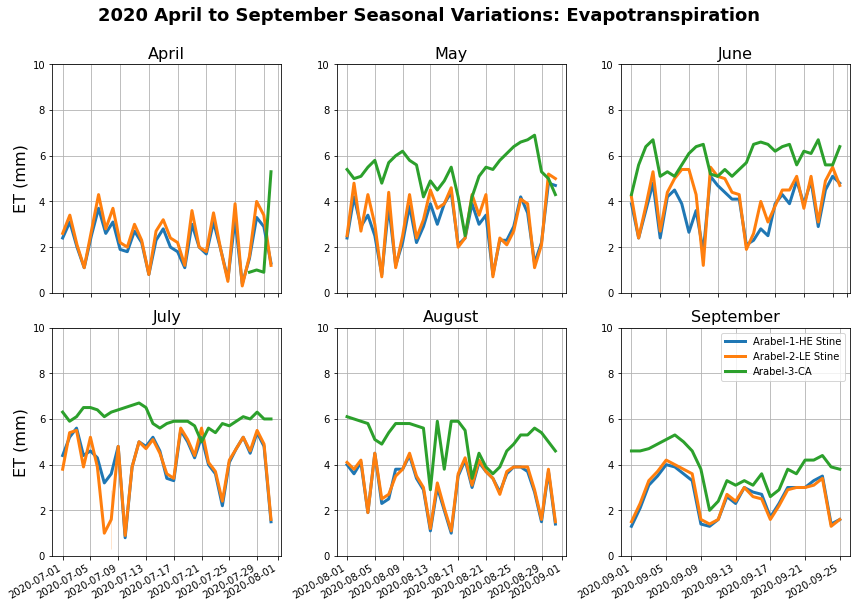

In [483]:
# Create the new figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8),facecolor='w', edgecolor='k');
fig.tight_layout()
fig.autofmt_xdate()

item='et'#'meant'
ymax=np.ceil(df2[item].max())+3
ymin=max(np.floor(df2[item].min())-5,0)  

month=df2[df2.index.month==4].copy()
g=sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[0][0], palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('April',fontsize=16)
g.legend_.remove()
g.axes.set_ylabel('ET (mm)',fontsize=16)

month=df2[df2.index.month==5].copy()
g = sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[0][1], palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('May',fontsize=16)
g.legend_.remove()
g.axes.set(ylabel=None)

month=df2[df2.index.month==6].copy()
g=sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[0][2], palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('June',fontsize=16)
g.legend_.remove()
g.axes.set(ylabel=None)

month=df2[df2.index.month==7].copy()
g=sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[1][0], palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('July',fontsize=16)
g.legend_.remove()
g.axes.set_ylabel('ET (mm)',fontsize=16)
g.axes.set(xlabel=None)

month=df2[df2.index.month==8].copy()
g=sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[1][1], palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('August',fontsize=16)
g.legend_.remove()
g.axes.set(ylabel=None)
g.axes.set(xlabel=None)

month=df2[df2.index.month==9].copy()
g=sns.lineplot(x=month.index, y=month[item], data=month, lw=3, hue='device',ax = axes[1][2],legend='brief', 
               palette="tab10")
g.axes.set_ylim(ymin,ymax)
g.axes.set_title('September',fontsize=16)
g.axes.set(ylabel=None)
g.axes.set(xlabel=None)
g.axes.legend(labels=['Arabel-1-HE Stine', 'Arabel-2-LE Stine', 'Arabel-3-CA'])

# title
st=fig.suptitle("2020 April to September Seasonal Variations: Evapotranspiration",fontsize=18,fontweight='bold')
st.set_y(1.05)
#fig.subplots_adjust(top=0.85)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

# 3. Side-by-Side Comparison: Delaware
## 3.1 Arable units vs. Stine and DEOS weather stations (Newark, DE)

In [745]:
# Querying LE
device2 = ['C003354']
#df = client.data('hourly',devices = devices,start_time = '2020-07-08', end_time = '2020-08-31')
df3 = client.data('daily',devices = device2,start_time = '2020-07-10', end_time = '2020-09-30')
df3['time'] = pd.to_datetime(df3['time']).dt.strftime("%Y%m%d")
df3 = df3.set_index(['time'])
# fully show the columns
pd.set_option('display.max_columns', None)  
#df3.head(3)
start = '20200710'
end = '20200916'
le=df3[['meant','wind_speed','precip','maxt','maxt_time','mint','mint_time']].loc[(df3.index >= start) & (df3.index <= end)].copy()
le.head(3)

,meant,wind_speed,precip,maxt,maxt_time,mint,mint_time
time,,,,,,,
20200710,23.4,1.99,43.9,25.6,2020-07-10T16:57:58Z,22.1,2020-07-10T20:03:33Z
20200711,25.6,3.06,0.0,30.3,2020-07-11T18:25:23Z,20.7,2020-07-11T02:24:18Z
20200712,25.3,1.02,1.5,30.4,2020-07-12T15:57:50Z,18.2,2020-07-12T06:29:06Z


In [710]:
# Querying DEOS - UD Farm
import os
os.chdir('D:\\3. WorkSpace\\Drone Project\\2020 Arable')
os.getcwd()

# Loading Excel
df4 = pd.read_excel('D:/3. WorkSpace/Drone Project/2020 Arable/UD and Stine weather data.xlsx',encoding='latin1',
                  sheet_name = 'UDFarm (2)')
df4['time'] = pd.to_datetime(df4['time'])
df4 = df4.set_index(['time'])
# View the data
start = '20200710'
end = '20200916'
udFarm = df4[['meant','maxt','mint','meanWindSpeed','rainfall']].loc[(df4.index >= start) & (df4.index <= end)].copy()
udFarm.head(3)

,meant,maxt,mint,meanWindSpeed,rainfall
time,,,,,
2020-07-10,74.4,77.1,72.5,5.0,2.53
2020-07-11,79.2,87.6,70.2,3.7,0.00
2020-07-12,79.2,88.3,68.9,3.9,0.26


In [733]:
# unit conversion
udFarm['meantDegC']=(udFarm['meant']-32) * 5/9
udFarm['maxtDegC']=(udFarm['maxt']-32) * 5/9
udFarm['mintDegC']=(udFarm['mint']-32) * 5/9
udFarm['meanWindSpeedM']=udFarm['meanWindSpeed'] * 0.44704
udFarm['rainfallM']=udFarm['rainfall'] * 25.4
udFarm.head(3)     

,meant,maxt,mint,meanWindSpeed,rainfall,meantDegC,maxtDegC,mintDegC,meanWindSpeedM,rainfallM
time,,,,,,,,,,
2020-07-10,74.4,77.1,72.5,5.0,2.53,23.555556,25.055556,22.500000,2.235200,64.262
2020-07-11,79.2,87.6,70.2,3.7,0.00,26.222222,30.888889,21.222222,1.654048,0.000
2020-07-12,79.2,88.3,68.9,3.9,0.26,26.222222,31.277778,20.500000,1.743456,6.604


In [712]:
# Querying Stine DavisVantagePro2
# Loading Excel
df5 = pd.read_excel('D:/3. WorkSpace/Drone Project/2020 Arable/UD and Stine weather data.xlsx',encoding='latin1',
                  sheet_name = 'DavisVantagePro2 (2)')
df5['time'] = pd.to_datetime(df5['time'])
df5 = df5.set_index(['time'])
df5.head(3)
# View the data
start = '20200710'
end = '20200831'
stine = df5[['meant','meanWindSpeed','rain','maxt','maxt_time','mint','mint_time']].loc[(df5.index >= start) & (df5.index <= end)].copy()
stine.head(3)

,meant,meanWindSpeed,rain,maxt,maxt_time,mint,mint_time
time,,,,,,,
2020-07-10,74.0,3.2,0.34,77.8,12:30a,72.4,8:30p
2020-07-11,78.5,2.4,0.04,87.0,4:30p,69.6,3:00a
2020-07-12,78.4,1.8,0.02,87.7,4:30p,67.0,6:30a


In [731]:
# unit conversion
stine['meantDegC']=(stine['meant']-32) * 5/9
stine['maxtDegC']=(stine['maxt']-32) * 5/9
stine['mintDegC']=(stine['mint']-32) * 5/9
stine['meanWindSpeedM']=stine['meanWindSpeed'] * 0.44704
stine['rainfallM']=stine['rain'] * 25.4
stine.head(3)  
print(stine.shape)
print(le.shape)
print(udFarm.shape)

(53, 12)
(69, 7)
(69, 5)


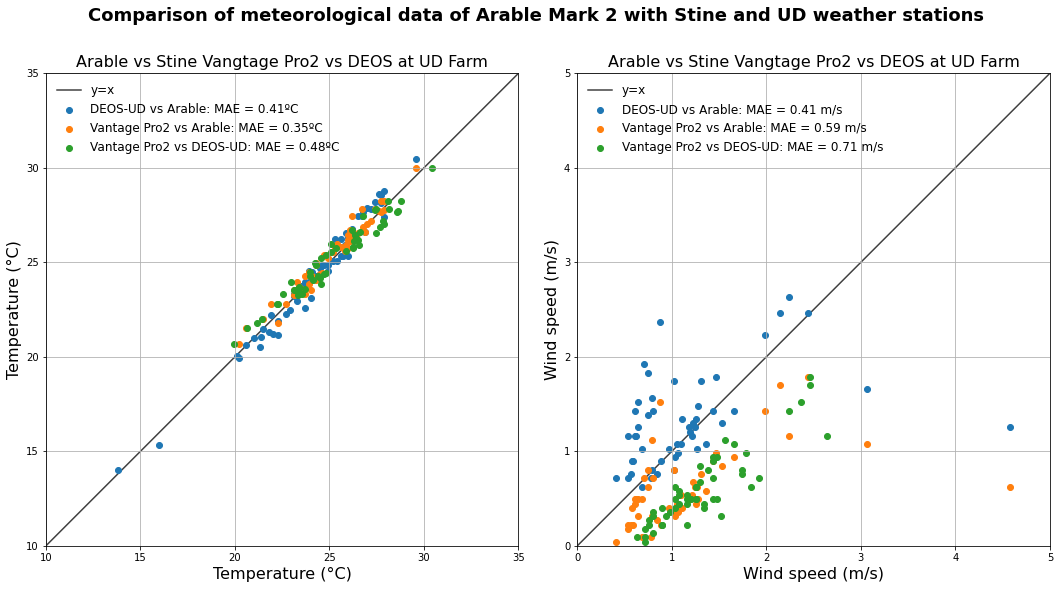

In [735]:
# calculate temp mae
mae1 = np.mean(np.absolute(le['meant'] - udFarm['meantDegC']))
mae2 = np.mean(np.absolute(le['meant'].loc[(le.index >= '20200710')
                                           & (le.index <= '20200831')] - stine['meantDegC'])) 
mae3 = np.mean(np.absolute(udFarm['meantDegC'].loc[(udFarm.index >= '20200710')
                                                   & (udFarm.index <= '20200831')] - stine['meantDegC']))
# plot comparison data
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15, 15))

## plot temp-Arable LE vs DEOS
ax[0].scatter(le['meant'],
              udFarm['meantDegC'],
              label='DEOS-UD vs Arable: MAE = {:0.2f}ºC'.format(mae1))
## plot temp-Arable LE vs Davis-Stine
ax[0].scatter(le['meant'].loc[(le.index >= '20200710') & (le.index <= '20200831')],
              stine['meantDegC'],
              label='Vantage Pro2 vs Arable: MAE = {:0.2f}ºC'.format(mae2))
## plot temp-DEOS vs Davis-Stine
ax[0].scatter(udFarm['meantDegC'].loc[(udFarm.index >= '20200710') & (udFarm.index <= '20200831')],
              stine['meantDegC'],
              label='Vantage Pro2 vs DEOS-UD: MAE = {:0.2f}ºC'.format(mae3))

# set style
ax[0].set_aspect('equal')
ax[0].set_xlim(10,35)
ax[0].set_ylim(10,35)

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'k-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Temperature (°C)',fontsize=16)
ax[0].set_ylabel('Temperature (°C)',fontsize=16)
ax[0].set_title('Arable vs Stine Vangtage Pro2 vs DEOS at UD Farm',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

#################################################################################
# calculate wind mae
mae1 = np.mean(np.absolute(le['wind_speed'] - udFarm['meanWindSpeedM']))
mae2 = np.mean(np.absolute(le['wind_speed'].loc[(le.index >= '20200710')
                                           & (le.index <= '20200831')] - stine['meanWindSpeedM'])) 
mae3 = np.mean(np.absolute(udFarm['meanWindSpeedM'].loc[(udFarm.index >= '20200710')
                                                   & (udFarm.index <= '20200831')] - stine['meanWindSpeedM']))

## plot temp-Arable LE vs DEOS
ax[1].scatter(le['wind_speed'],
              udFarm['meanWindSpeedM'],
              label='DEOS-UD vs Arable: MAE = {:0.2f} m/s'.format(mae1))
## plot temp-Arable LE vs Davis-Stine
ax[1].scatter(le['wind_speed'].loc[(le.index >= '20200710') & (le.index <= '20200831')],
              stine['meanWindSpeedM'],
              label='Vantage Pro2 vs Arable: MAE = {:0.2f} m/s'.format(mae2))
## plot temp-DEOS vs Davis-Stine
ax[1].scatter(udFarm['meanWindSpeedM'].loc[(udFarm.index >= '20200710') & (udFarm.index <= '20200831')],
              stine['meanWindSpeedM'],
              label='Vantage Pro2 vs DEOS-UD: MAE = {:0.2f} m/s'.format(mae3))

# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(0,5)
ax[1].set_ylim(0,5)

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'k-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('Wind speed (m/s)',fontsize=16)
ax[1].set_ylabel('Wind speed (m/s)',fontsize=16)
ax[1].set_title('Arable vs Stine Vangtage Pro2 vs DEOS at UD Farm',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# title
fig.suptitle('Comparison of meteorological data of Arable Mark 2 with Stine and UD weather stations\n ',
             fontsize=18,
             fontweight='bold',y=0.78)
#st.set_y(1.05)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

## 3.2 Arable units vs. Stine: Max and Min Temperature Comparison: Newark, DE

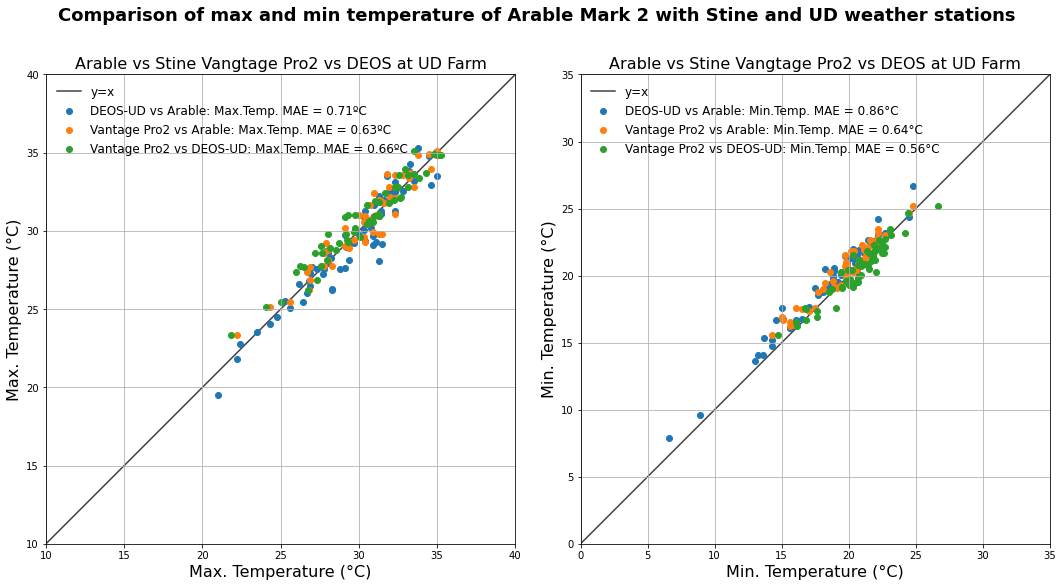

In [758]:
# calculate max temp mae
mae1 = np.mean(np.absolute(le['maxt'] - udFarm['maxtDegC']))
mae2 = np.mean(np.absolute(le['maxt'].loc[(le.index >= '20200710')
                                           & (le.index <= '20200831')] - stine['maxtDegC'])) 
mae3 = np.mean(np.absolute(udFarm['maxtDegC'].loc[(udFarm.index >= '20200710')
                                                   & (udFarm.index <= '20200831')] - stine['maxtDegC']))
# plot comparison data
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (15, 15))

## plot temp-Arable LE vs DEOS
ax[0].scatter(le['maxt'],
              udFarm['maxtDegC'],
              label='DEOS-UD vs Arable: Max.Temp. MAE = {:0.2f}ºC'.format(mae1))
## plot temp-Arable LE vs Davis-Stine
ax[0].scatter(le['maxt'].loc[(le.index >= '20200710') & (le.index <= '20200831')],
              stine['maxtDegC'],
              label='Vantage Pro2 vs Arable: Max.Temp. MAE = {:0.2f}ºC'.format(mae2))
## plot temp-DEOS vs Davis-Stine
ax[0].scatter(udFarm['maxtDegC'].loc[(udFarm.index >= '20200710') & (udFarm.index <= '20200831')],
              stine['maxtDegC'],
              label='Vantage Pro2 vs DEOS-UD: Max.Temp. MAE = {:0.2f}ºC'.format(mae3))

# set style
ax[0].set_aspect('equal')
ax[0].set_xlim(10,40)
ax[0].set_ylim(10,40)

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'k-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Max. Temperature (°C)',fontsize=16)
ax[0].set_ylabel('Max. Temperature (°C)',fontsize=16)
ax[0].set_title('Arable vs Stine Vangtage Pro2 vs DEOS at UD Farm',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

#################################################################################
# calculate wind mae
mae1 = np.mean(np.absolute(le['mint'] - udFarm['mintDegC']))
mae2 = np.mean(np.absolute(le['mint'].loc[(le.index >= '20200710')
                                           & (le.index <= '20200831')] - stine['mintDegC'])) 
mae3 = np.mean(np.absolute(udFarm['mintDegC'].loc[(udFarm.index >= '20200710')
                                                   & (udFarm.index <= '20200831')] - stine['mintDegC']))

## plot temp-Arable LE vs DEOS
ax[1].scatter(le['mint'],
              udFarm['mintDegC'],
              label='DEOS-UD vs Arable: Min.Temp. MAE = {:0.2f}°C'.format(mae1))
## plot temp-Arable LE vs Davis-Stine
ax[1].scatter(le['mint'].loc[(le.index >= '20200710') & (le.index <= '20200831')],
              stine['mintDegC'],
              label='Vantage Pro2 vs Arable: Min.Temp. MAE = {:0.2f}°C'.format(mae2))
## plot temp-DEOS vs Davis-Stine
ax[1].scatter(udFarm['mintDegC'].loc[(udFarm.index >= '20200710') & (udFarm.index <= '20200831')],
              stine['mintDegC'],
              label='Vantage Pro2 vs DEOS-UD: Min.Temp. MAE = {:0.2f}°C'.format(mae3))

# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(0,35)
ax[1].set_ylim(0,35)

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'k-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('Min. Temperature (°C)',fontsize=16)
ax[1].set_ylabel('Min. Temperature (°C)',fontsize=16)
ax[1].set_title('Arable vs Stine Vangtage Pro2 vs DEOS at UD Farm',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# title
fig.suptitle('Comparison of max and min temperature of Arable Mark 2 with Stine and UD weather stations\n ',
             fontsize=18,
             fontweight='bold',y=0.78)
#st.set_y(1.05)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

## 3.3 Arable units HE vs. LE Comparison at Newark, DE

In [956]:
df8.head(2)

,cgdd,cl,crop_water_demand,device,dli,ea,et,etc,gdd,kc,lat,lfairdelta,lfw,location,long,low_quality,max_tdew,maxt,maxt_time,mean_tbelow,meant,min_rh,mint,mint_time,ndvi,prate,precip,precip_hours,rh_at_maxt,rh_at_mint,sample_pct,slp,sunshine_duration,swdw,tdew,tdew_at_mint,vpd,wind_direction,wind_heading,wind_speed,wind_speed_max,wind_speed_min
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20200610,14.7,2.42,-2.0,C003308,34.22,2.09,3.6,2.1,14.7,0.58,39.6648,-3.3,7.0,5edf8e64bfa791d1f77c5bfc,-75.8031,False,23.7,31.4,2020-06-10T15:58:21Z,24.5,25.3,0.58,18.1,2020-06-10T03:06:45Z,0.51,None,0.1,0.0,0.58,0.98,0.94,100.8,10.7,17.4,21.2,17.8,0.8,SW,244.87,2.26,6.6,0.0
20200611,29.3,3.09,21.3,C003308,15.89,2.71,1.8,1.1,14.6,0.63,39.6648,0.6,13.0,5edf8e64bfa791d1f77c5bfc,-75.8031,False,23.0,27.8,2020-06-11T17:13:50Z,24.5,24.6,0.69,21.3,2020-06-11T12:39:55Z,0.55,None,22.4,11.0,0.69,0.95,0.95,101.0,5.1,8.1,22.0,20.4,0.4,WSW,268.75,1.53,5.2,0.0


In [963]:
# Querying HE
device1 = ['C003308']
#df = client.data('hourly',devices = devices,start_time = '2020-07-08', end_time = '2020-08-31')
df8 = client.data('daily',devices = device1,start_time = '2020-06-10', end_time = '2020-09-30')
df8['time'] = pd.to_datetime(df8['time']).dt.strftime("%Y%m%d")
df8 = df8.set_index(['time'])
# fully show the columns
pd.set_option('display.max_columns', None)  
df8.head(3)
start = '20200710'
end = '20200930'
she=df8[['meant','maxt','maxt_time','mint','mint_time','wind_speed','wind_speed_max', 'wind_speed_min', 
        'precip','ndvi','et','crop_water_demand']].loc[(df8.index >= start) & (df8.index < end)].copy()
sle=df3[['meant','maxt','maxt_time','mint','mint_time','wind_speed','wind_speed_max', 'wind_speed_min',
        'precip','ndvi','et','crop_water_demand']].loc[(df3.index >= start) & (df3.index < end)].copy()


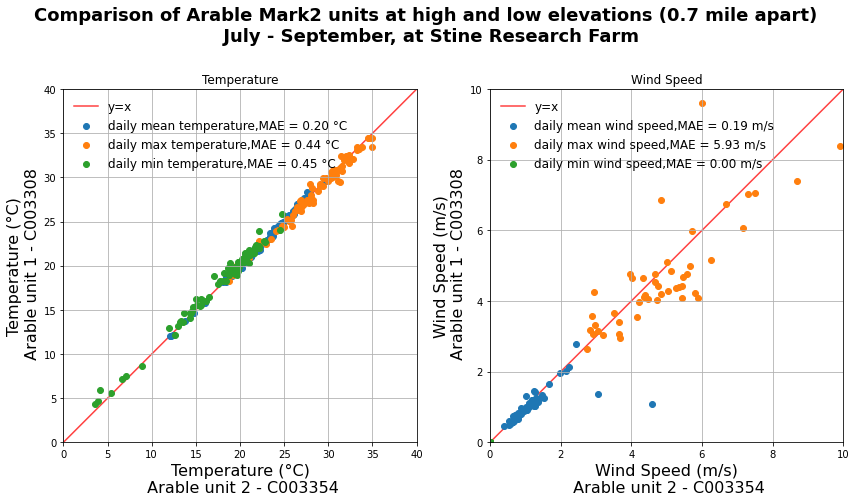

In [783]:
# plot comparison data: temp, wind, + Max and Min
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (12, 12))

# calculate mae
mae1 = np.mean(np.absolute(sle['meant'] - she['meant']))
mae2 = np.mean(np.absolute(sle['maxt'] - she['maxt']))
mae3 = np.mean(np.absolute(sle['mint'] - she['mint']))

## plot temp
ax[0].scatter(sle['meant'],she['meant'],label='daily mean temperature,MAE = {:0.2f} °C'.format(mae1))
ax[0].scatter(sle['maxt'],she['maxt'],label='daily max temperature,MAE = {:0.2f} °C'.format(mae2))
ax[0].scatter(sle['mint'],she['mint'],label='daily min temperature,MAE = {:0.2f} °C'.format(mae3))

# set style
ax[0].set_aspect('equal')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,40)
ax[0].set_title('Temperature')

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Temperature (°C)\n Arable unit 2 - C003354',fontsize=16)
ax[0].set_ylabel('Temperature (°C)\n Arable unit 1 - C003308',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

##########################################################################################
# calculate mae
mae11 = np.mean(np.absolute(sle['wind_speed'] - she['wind_speed']))
mae12 = np.mean(np.absolute(sle['wind_speed_max'] - she['wind_speed_max']))
mae13 = np.mean(np.absolute(sle['wind_speed_min'] - she['wind_speed_min']))

## plot wind
ax[1].scatter(sle['wind_speed'],she['wind_speed'],label='daily mean wind speed,MAE = {:0.2f} m/s'.format(mae11))
ax[1].scatter(sle['wind_speed_max'],she['wind_speed_max'],label='daily max wind speed,MAE = {:0.2f} m/s'.format(mae12))
ax[1].scatter(sle['wind_speed_min'],she['wind_speed_min'],label='daily min wind speed,MAE = {:0.2f} m/s'.format(mae13))

# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,10)
ax[1].set_title('Wind Speed')

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('Wind Speed (m/s)\n Arable unit 2 - C003354',fontsize=16)
ax[1].set_ylabel('Wind Speed (m/s)\n Arable unit 1 - C003308',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# title
st=fig.suptitle('Comparison of Arable Mark2 units at high and low elevations (0.7 mile apart) \n July - September, at Stine Research Farm',
             fontsize=18,
             fontweight='bold',y=0.7)
st.set_y(0.8)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

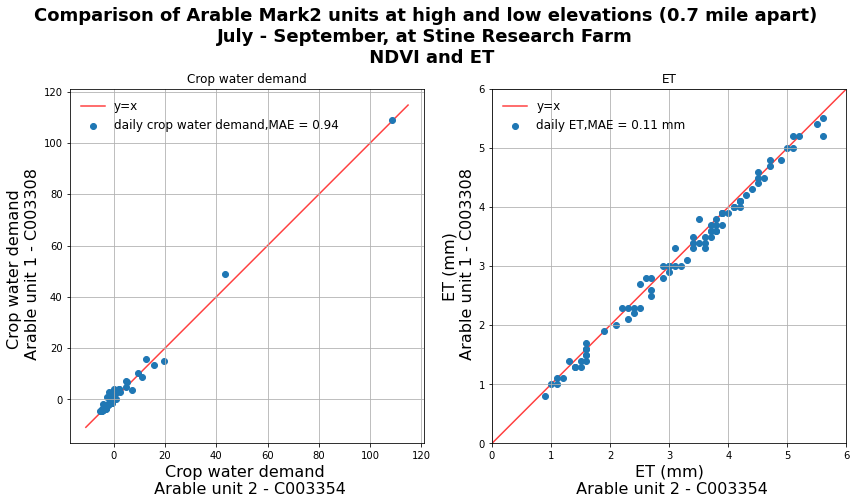

In [964]:
# plot comparison data: temp, wind, + Max and Min
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (12, 12))

# calculate mae
mae21 = np.mean(np.absolute(sle['crop_water_demand'] - she['crop_water_demand']))

## plot temp
ax[0].scatter(sle['crop_water_demand'],she['crop_water_demand'],label='daily crop water demand,MAE = {:0.2f}'.format(mae21))
# set style
ax[0].set_aspect('equal')
# ax[0].set_xlim(0.4,1)
# ax[0].set_ylim(0.4,1)
ax[0].set_title('Crop water demand')

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Crop water demand \n Arable unit 2 - C003354',fontsize=16)
ax[0].set_ylabel('Crop water demand \n Arable unit 1 - C003308',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

##########################################################################################
# calculate mae
mae22 = np.mean(np.absolute(sle['et'] - she['et']))

## plot wind
ax[1].scatter(sle['et'],she['et'],label='daily ET,MAE = {:0.2f} mm'.format(mae22))

# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(0,6)
ax[1].set_ylim(0,6)
ax[1].set_title('ET')

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('ET (mm)\n Arable unit 2 - C003354',fontsize=16)
ax[1].set_ylabel('ET (mm)\n Arable unit 1 - C003308',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# title
st=fig.suptitle('Comparison of Arable Mark2 units at high and low elevations (0.7 mile apart) \nJuly - September, at Stine Research Farm \n NDVI and ET',
             fontsize=18,
             fontweight='bold',y=0.7)
st.set_y(0.8)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

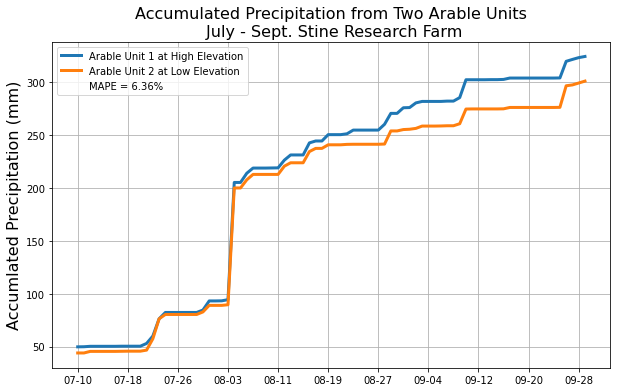

In [952]:
import matplotlib.dates as mdates
index = pd.to_datetime(sle.index)
# month_name = index.strftime("%b")
# day_number = index.strftime("%d")

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# calculate
cumulative1 = np.cumsum(sle['precip']) # LE
cumulative2 = np.cumsum(she['precip']) # HE
mape = np.mean(np.abs(cumulative1-cumulative2)/cumulative2)*100
# plot
ax.plot(sle.index,cumulative2,label='Arable Unit 1 at High Elevation',lw=3)
ax.plot(sle.index,cumulative1,label='Arable Unit 2 at Low Elevation',lw=3)
# label
ax.set_ylabel("Accumlated Precipitation (mm)",fontsize =16)
ax.set_title("Accumulated Precipitation from Two Arable Units\n July - Sept. Stine Research Farm",fontsize =16)
ax.legend(loc=4,fontsize=10) # make a legend and place in bottom-right (loc=4)
# add mape
import matplotlib.patches as mpatch
extraString = 'MAPE = {:0.2f}%'.format(mape)
handles, labels = ax.get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax.legend(handles=handles)

# adjust x grid
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d')) 
labels = ax.get_xticklabels()
# plt.setp(labels, rotation=85, fontsize=8)

# 4. Side-by-Side Comparison : Madera, CA
## 4.1 Arable units vs. Campbell weather stations 

In [646]:
# Querying Madera
device3 = ['C003305']
start = '20200501'
end = '20200930'
#df = client.data('hourly',devices = devices,start_time = '2020-07-08', end_time = '2020-08-31')
df6 = client.data('daily',devices = device3,start_time = start, end_time = end)
df6['time'] = pd.to_datetime(df6['time']).dt.strftime("%Y%m%d")
df6 = df6.set_index(['time'])
# fully show the columns
pd.set_option('display.max_columns', None)  
df6.head(3)
ma=df6[['meant','wind_speed','et','maxt','maxt_time','mint','mint_time']].copy()
ma.head(3)

,meant,wind_speed,et,maxt,maxt_time,mint,mint_time
time,,,,,,,
20200501,18.7,2.38,5.4,27.3,2020-05-01T16:52:25Z,9.9,2020-05-01T05:57:09Z
20200502,18.6,2.91,5.0,26.9,2020-05-02T15:52:12Z,9.9,2020-05-02T05:17:54Z
20200503,18.2,2.46,5.1,25.4,2020-05-03T16:27:57Z,11.8,2020-05-03T23:52:00Z


In [647]:
# unit conversion
ma['meantDegF']=ma['meant']/5*9+32 
ma['maxtDegF']=ma['maxt']/5*9+32 
ma['mintDegF']=ma['mint']/5*9+32 
ma['wind_speedMph']=ma['wind_speed'] * 2.23694
ma['etIn']=ma['et'] * 0.0393701
ma.head(3)                   

,meant,wind_speed,et,maxt,maxt_time,mint,mint_time,meantDegF,maxtDegF,mintDegF,wind_speedMph,etIn
time,,,,,,,,,,,,
20200501,18.7,2.38,5.4,27.3,2020-05-01T16:52:25Z,9.9,2020-05-01T05:57:09Z,65.66,81.14,49.82,5.323917,0.212599
20200502,18.6,2.91,5.0,26.9,2020-05-02T15:52:12Z,9.9,2020-05-02T05:17:54Z,65.48,80.42,49.82,6.509495,0.196850
20200503,18.2,2.46,5.1,25.4,2020-05-03T16:27:57Z,11.8,2020-05-03T23:52:00Z,64.76,77.72,53.24,5.502872,0.200788


In [649]:
# Querying Campbell system
# Loading Excel
df7 = pd.read_excel('D:/3. WorkSpace/Drone Project/2020 Arable/UD and Stine weather data.xlsx',encoding='latin1',
                  sheet_name = 'CACampbell (2)')
df7['time'] = pd.to_datetime(df7['time'])
df7 = df7.set_index(['time'])
df7.head(3)
camp = df7[['meant','meanWindSpeed','et','maxt','mint']].copy()
camp.head(3)

,meant,meanWindSpeed,et,maxt,mint
time,,,,,
2020-05-01,64.9,6.5,0.251,82.3,49.0
2020-05-02,64.9,7.8,0.234,80.4,49.0
2020-05-03,63.7,6.6,0.229,78.2,50.6


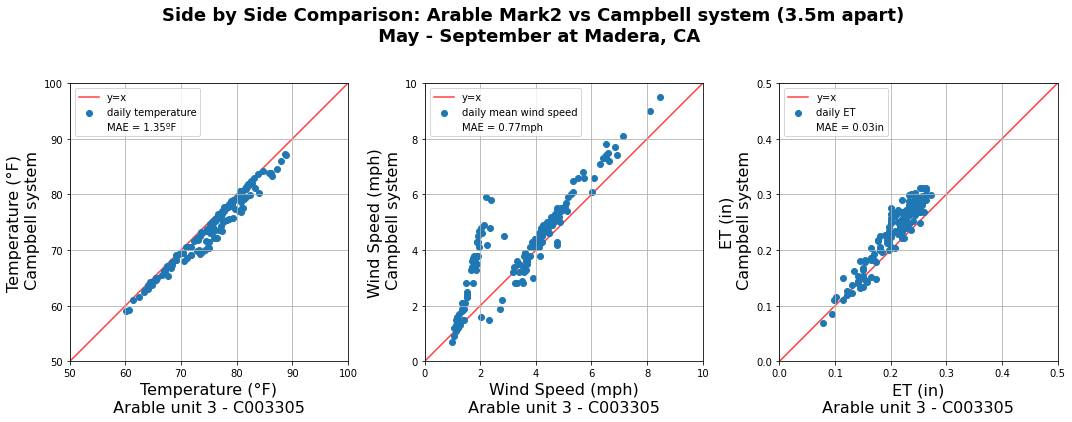

In [640]:
# plot comparison data
fig, ax = plt.subplots(nrows=1,ncols=3,figsize = (15, 15))

## plot temp
ax[0].scatter(ma['meantDegF'],camp['meant'],label='daily temperature')
# calculate mae
mae = np.mean(np.absolute(ma['meantDegF'] - camp['meant']))
             
# set style
ax[0].set_aspect('equal')
ax[0].set_xlim(50,100)
ax[0].set_ylim(50,100)

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Temperature (°F)\n Arable unit 3 - C003305 ',fontsize=16)
ax[0].set_ylabel('Temperature (°F)\n Campbell system',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# add mae
import matplotlib.patches as mpatch
extraString = 'MAE = {:0.2f}ºF'.format(mae)
handles, labels = ax[0].get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax[0].legend(handles=handles)
##########################################################################################
## plot wind
ax[1].scatter(ma['wind_speedMph'],camp['meanWindSpeed'],label='daily mean wind speed')
# calculate mae
mae2 = np.mean(np.absolute(ma['wind_speedMph'] - camp['meanWindSpeed']))
# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,10)

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('Wind Speed (mph)\n Arable unit 3 - C003305 ',fontsize=16)
ax[1].set_ylabel('Wind Speed (mph)\n Campbell system',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# add mae
extraString = 'MAE = {:0.2f}mph'.format(mae2)
handles, labels = ax[1].get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax[1].legend(handles=handles)

##########################################################################################
## plot wind
ax[2].scatter(ma['etIn'],camp['et'],label='daily ET')
# calculate mae
mae3 = np.mean(np.absolute(ma['etIn'] - camp['et']))
# set style
ax[2].set_aspect('equal')
ax[2].set_xlim(0,0.5)
ax[2].set_ylim(0,0.5)

# plot y=x
lims = [
    np.min([ax[2].get_xlim(), ax[2].get_ylim()]),  # min of both axes
    np.max([ax[2].get_xlim(), ax[2].get_ylim()]),  # max of both axes
]
#print(lims)
ax[2].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[2].set_xlabel('ET (in)\n Arable unit 3 - C003305 ',fontsize=16)
ax[2].set_ylabel('ET (in)\n Campbell system',fontsize=16)
ax[2].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# add mae
extraString = 'MAE = {:0.2f}in'.format(mae3)
handles, labels = ax[2].get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax[2].legend(handles=handles)

# title
fig.suptitle('Side by Side Comparison: Arable Mark2 vs Campbell system (3.5m apart) \n May - September at Madera, CA',
             fontsize=18,
             fontweight='bold',y=0.7)
#st.set_y(1.05)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()

## 4.2 Max and Min Temperature Comparison: Madera CA

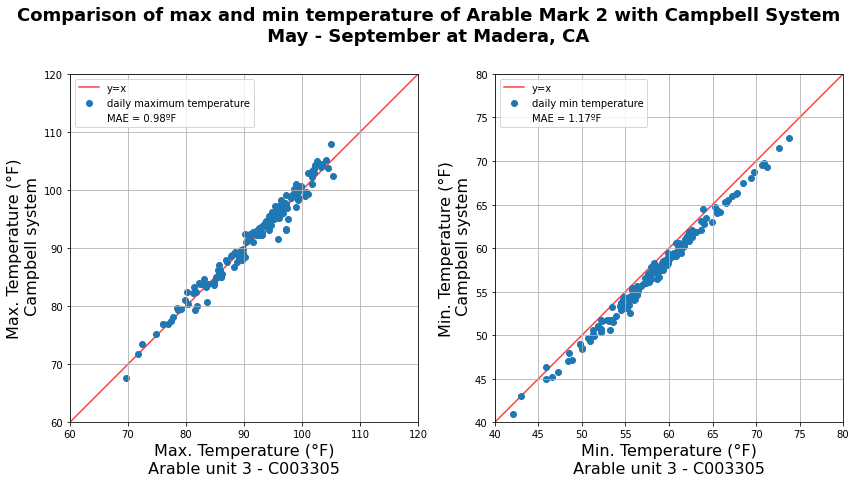

In [965]:
# plot comparison data
fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (12, 12))

## plot temp
ax[0].scatter(ma['maxtDegF'],camp['maxt'],label='daily maximum temperature')
# calculate mae
mae = np.mean(np.absolute(ma['maxtDegF'] - camp['maxt']))
             
# set style
ax[0].set_aspect('equal')
ax[0].set_xlim(60,120)
ax[0].set_ylim(60,120)

# plot y=x
lims = [
    np.min([ax[0].get_xlim(), ax[0].get_ylim()]),  # min of both axes
    np.max([ax[0].get_xlim(), ax[0].get_ylim()]),  # max of both axes
]
#print(lims)
ax[0].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[0].set_xlabel('Max. Temperature (°F)\n Arable unit 3 - C003305 ',fontsize=16)
ax[0].set_ylabel('Max. Temperature (°F)\n Campbell system',fontsize=16)
ax[0].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# add mae
import matplotlib.patches as mpatch
extraString = 'MAE = {:0.2f}ºF'.format(mae)
handles, labels = ax[0].get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax[0].legend(handles=handles)
####################################
## plot temp
ax[1].scatter(ma['mintDegF'],camp['mint'],label='daily min temperature')
# calculate mae
mae2 = np.mean(np.absolute(ma['mintDegF'] - camp['mint']))
             
# set style
ax[1].set_aspect('equal')
ax[1].set_xlim(40,80)
ax[1].set_ylim(40,80)

# plot y=x
lims = [
    np.min([ax[1].get_xlim(), ax[1].get_ylim()]),  # min of both axes
    np.max([ax[1].get_xlim(), ax[1].get_ylim()]),  # max of both axes
]
#print(lims)
ax[1].plot(lims, lims, 'r-', alpha=0.75, zorder=0,label='y=x')

# set label
ax[1].set_xlabel('Min. Temperature (°F)\n Arable unit 3 - C003305 ',fontsize=16)
ax[1].set_ylabel('Min. Temperature (°F)\n Campbell system',fontsize=16)
ax[1].legend(loc = 'upper left',framealpha = 1, frameon = False,fontsize=12);

# add mae
import matplotlib.patches as mpatch
extraString = 'MAE = {:0.2f}ºF'.format(mae2)
handles, labels = ax[1].get_legend_handles_labels()
handles.append(mpatch.Patch(color='none', label=extraString))
ax[1].legend(handles=handles)

# title
fig.suptitle('Comparison of max and min temperature of Arable Mark 2 with Campbell System\n May - September at Madera, CA ',
             fontsize=18,
             fontweight='bold',y=0.78)
#st.set_y(1.05)
#fig.subplots_adjust(top=0.01)
plt.rcParams['axes.grid'] = True
fig.tight_layout()